In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATA FROM CSV FILE

In [2]:
df=pd.read_csv('H2HBABBA3064.csv')

In [3]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200519201,KROGE,2019-07-11 00:00:00,2019.0,1.929538e+09,2019-06-26,20190625,20190626,20190711.0,USD,RV,1.0,NaN,5528.68,20190626.0,NAA8,1.929538e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-10-17 00:00:00,2019.0,1.929972e+09,2019-10-07,20191005,20191007,20191022.0,USD,RV,1.0,NaN,17420.26,20191007.0,NAH4,1.929972e+09,0
2,U001,0200718130,SYSCO F in,2019-01-28 00:00:00,2019.0,1.928602e+09,2019-01-10,20190110,20190110,20190125.0,USD,RV,1.0,NaN,8708.71,20190110.0,NAA8,1.928602e+09,0
3,U001,0200705742,DOT foundation,2019-03-11 00:00:00,2019.0,1.928847e+09,2019-02-22,20190223,20190222,20190314.0,USD,RV,1.0,NaN,19236.54,20190222.0,NAD1,1.928847e+09,0
4,U001,0200803720,DEC us,2019-11-01 00:00:00,2019.0,1.930046e+09,2019-10-23,20191023,20191023,20191108.0,USD,RV,1.0,NaN,14669.57,20191016.0,NAM4,1.930046e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200793513,KROGER llc,2019-05-29 00:00:00,2019.0,1.929315e+09,2019-05-14,20190514,20190514,20190529.0,USD,RV,1.0,NaN,46456.93,20190514.0,NAA8,1.929315e+09,0
49996,U001,0200803720,DEC trust,NaN,2020.0,1.930614e+09,2020-03-07,20200307,20200307,20200308.0,USD,RV,1.0,NaN,895.87,20200301.0,NAM1,1.930614e+09,1
49997,U001,0200726979,BJ'S in,2019-11-26 00:00:00,2019.0,1.930138e+09,2019-11-11,20191111,20191111,20191126.0,USD,RV,1.0,NaN,48.60,20191111.0,NAA8,1.930138e+09,0
49998,U001,0200729942,SA systems,2019-02-22 00:00:00,2019.0,1.928782e+09,2019-02-11,20190211,20190211,20190417.0,USD,RV,1.0,NaN,4007.18,20190211.0,NAGD,1.928782e+09,0


In [4]:
df.shape

(50000, 19)

In [5]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [6]:
df=df.drop(['area_business','posting_id'],axis=1)

In [7]:
# CHECKING CORRELATION
df[['document_create_date','document_create_date.1']].corr()

,document_create_date,document_create_date.1
document_create_date,1.00000,0.99348
document_create_date.1,0.99348,1.00000


In [8]:

df[['doc_id','invoice_id']].corr()

,doc_id,invoice_id
doc_id,1.0,1.0
invoice_id,1.0,1.0


In [9]:
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [10]:
df['invoice_id'].isnull().sum()

6

In [11]:
df.drop(df.loc[df['invoice_id'].isna(),:].index)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200519201,KROGE,2019-07-11,2019.0,1.929538e+09,2019-06-26,2019-06-25,2019-06-26,2019-07-11,USD,RV,5528.68,2019-06-26,NAA8,1.929538e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-10-17,2019.0,1.929972e+09,2019-10-07,2019-10-05,2019-10-07,2019-10-22,USD,RV,17420.26,2019-10-07,NAH4,1.929972e+09,0
2,U001,0200718130,SYSCO F in,2019-01-28,2019.0,1.928602e+09,2019-01-10,2019-01-10,2019-01-10,2019-01-25,USD,RV,8708.71,2019-01-10,NAA8,1.928602e+09,0
3,U001,0200705742,DOT foundation,2019-03-11,2019.0,1.928847e+09,2019-02-22,2019-02-23,2019-02-22,2019-03-14,USD,RV,19236.54,2019-02-22,NAD1,1.928847e+09,0
4,U001,0200803720,DEC us,2019-11-01,2019.0,1.930046e+09,2019-10-23,2019-10-23,2019-10-23,2019-11-08,USD,RV,14669.57,2019-10-16,NAM4,1.930046e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200793513,KROGER llc,2019-05-29,2019.0,1.929315e+09,2019-05-14,2019-05-14,2019-05-14,2019-05-29,USD,RV,46456.93,2019-05-14,NAA8,1.929315e+09,0
49996,U001,0200803720,DEC trust,NaT,2020.0,1.930614e+09,2020-03-07,2020-03-07,2020-03-07,2020-03-08,USD,RV,895.87,2020-03-01,NAM1,1.930614e+09,1
49997,U001,0200726979,BJ'S in,2019-11-26,2019.0,1.930138e+09,2019-11-11,2019-11-11,2019-11-11,2019-11-26,USD,RV,48.60,2019-11-11,NAA8,1.930138e+09,0
49998,U001,0200729942,SA systems,2019-02-22,2019.0,1.928782e+09,2019-02-11,2019-02-11,2019-02-11,2019-04-17,USD,RV,4007.18,2019-02-11,NAGD,1.928782e+09,0


In [12]:
df['invoice_id'].isnull().sum()

6

In [13]:
df.dropna(subset=['invoice_id'], inplace=True)

In [14]:
df['invoice_id'].isnull().sum()

0

In [15]:
df['document type'].value_counts()

RV    49994
Name: document type, dtype: int64

In [16]:
df.drop(['business_code','document type','buisness_year','isOpen'], axis = 1 , inplace = True)

In [17]:
df.dtypes

cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
dtype: object

In [18]:
df.isnull().sum()

cust_number                   0
name_customer                 0
clear_date                10000
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
dtype: int64

In [19]:
# REMOVING DUPLICATE ROWS FROM THE DATAFRAME
df = df.drop_duplicates(keep = False)
df.shape

(47548, 13)

In [20]:
df.head()

,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,200519201,KROGE,2019-07-11,1.929538e+09,2019-06-26,2019-06-25,2019-06-26,2019-07-11,USD,5528.68,2019-06-26,NAA8,1.929538e+09
1,0200769623,WAL-MAR foundation,2019-10-17,1.929972e+09,2019-10-07,2019-10-05,2019-10-07,2019-10-22,USD,17420.26,2019-10-07,NAH4,1.929972e+09
2,0200718130,SYSCO F in,2019-01-28,1.928602e+09,2019-01-10,2019-01-10,2019-01-10,2019-01-25,USD,8708.71,2019-01-10,NAA8,1.928602e+09
3,0200705742,DOT foundation,2019-03-11,1.928847e+09,2019-02-22,2019-02-23,2019-02-22,2019-03-14,USD,19236.54,2019-02-22,NAD1,1.928847e+09
4,0200803720,DEC us,2019-11-01,1.930046e+09,2019-10-23,2019-10-23,2019-10-23,2019-11-08,USD,14669.57,2019-10-16,NAM4,1.930046e+09


In [21]:
df.drop('document_create_date.1', axis = 1 , inplace = True)

In [22]:
df.nunique(axis = 0)

cust_number              1386
name_customer            4105
clear_date                392
doc_id                  47548
posting_date              503
document_create_date      506
due_in_date               551
invoice_currency            2
total_open_amount       43183
baseline_create_date      505
cust_payment_terms         78
invoice_id              47548
dtype: int64

In [23]:
df['invoice_currency'].value_counts()

USD    43801
CAD     3747
Name: invoice_currency, dtype: int64

In [24]:
# AS WE ONLY HAVE TWO UNNIQUE VALUES IN THE invoice_currency (NUMBER(USA) > NUMBER(CAD)).
# SO REPLACING THE VALUES WITH THE AVERAGE EXCHANGE RATES [ USD :  1, CAD : 0]

df['invoice_currency'] = df['invoice_currency'].str.replace('CAD',"0.7")
df['invoice_currency'] = df['invoice_currency'].str.replace('USD',"1")

In [25]:
# CONVERTING THE DTYPE FROM OBJECT TO FLOAT
change = df['invoice_currency'].astype(float)

In [26]:
# OVERWRITING THE invoice_currency WITH EXCHANGE VALUES
df = df.assign(invoice_currency = change)

In [27]:
df.drop('invoice_currency',axis = 1 , inplace = True)

In [28]:
b = df[df.clear_date.isnull()==True]
a = df[df.clear_date.isnull()==False]

In [29]:
b.shape

(9378, 11)

In [30]:
a.shape

(38170, 11)

In [31]:
#CALCULATING THE DELAY 
target = a['clear_date'] - a['due_in_date']
a = a.assign(delay = target)

In [32]:
a.head()

,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,200519201,KROGE,2019-07-11,1.929538e+09,2019-06-26,2019-06-25,2019-07-11,5528.68,2019-06-26,NAA8,1.929538e+09,0 days
1,0200769623,WAL-MAR foundation,2019-10-17,1.929972e+09,2019-10-07,2019-10-05,2019-10-22,17420.26,2019-10-07,NAH4,1.929972e+09,-5 days
2,0200718130,SYSCO F in,2019-01-28,1.928602e+09,2019-01-10,2019-01-10,2019-01-25,8708.71,2019-01-10,NAA8,1.928602e+09,3 days
3,0200705742,DOT foundation,2019-03-11,1.928847e+09,2019-02-22,2019-02-23,2019-03-14,19236.54,2019-02-22,NAD1,1.928847e+09,-3 days
4,0200803720,DEC us,2019-11-01,1.930046e+09,2019-10-23,2019-10-23,2019-11-08,14669.57,2019-10-16,NAM4,1.930046e+09,-7 days


In [33]:
# SELECTING DAYS FROM DELAY
a['delay'] = a['delay'].dt.days
a['delay']

0         0
1        -5
2         3
3        -3
4        -7
         ..
49993   -12
49995     0
49997     0
49998   -54
49999    -4
Name: delay, Length: 38170, dtype: int64

In [34]:
a.drop('clear_date',axis = 1, inplace =True)

In [35]:
# SORTING THE DATAFRAME ACCORDING TO posting_date.
a.sort_values('posting_date', inplace = True)

In [36]:
a.head()

,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
27116,0200759878,SA co,1.928534e+09,2018-12-30,2018-12-29,2019-01-14,40863.23,2018-12-30,NAH4,1.928534e+09,1
12409,0200769623,WAL-MAR systems,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,37091.32,2018-12-30,NAH4,1.928543e+09,-4
48573,0200726979,BJ'S corp,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,63.13,2018-12-30,NAA8,1.928540e+09,1
1410,0200466603,SMITH'S co,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,118687.65,2018-12-30,NAA8,1.928538e+09,0
26360,0200769623,WAL-MAR co,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,1445.64,2018-12-30,NAH4,1.928540e+09,-5


# SPLITTING THE FEATURES AND TARGET COLUMNS

In [37]:
X = a.drop('delay',axis = 1)

Y = a['delay']

# SPLITTING INTO TRAIN, VALIDATE AND LOCAL TEST

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_inter_test = train_test_split(X, test_size=0.3, random_state=0, shuffle=False)

Y_train, Y_inter_test = train_test_split(Y, test_size=0.3, random_state=0, shuffle=False)

X_validate,X_local_test,Y_validate,Y_local_test = train_test_split(X_inter_test,Y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [39]:
X_train.shape , Y_train.shape

((26719, 10), (26719,))

In [40]:
X_validate.shape , Y_validate.shape

((5725, 10), (5725,))

In [41]:
X_local_test.shape , Y_local_test.shape

((5726, 10), (5726,))

In [42]:
X_train.head()

,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
27116,0200759878,SA co,1.928534e+09,2018-12-30,2018-12-29,2019-01-14,40863.23,2018-12-30,NAH4,1.928534e+09
12409,0200769623,WAL-MAR systems,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,37091.32,2018-12-30,NAH4,1.928543e+09
48573,0200726979,BJ'S corp,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,63.13,2018-12-30,NAA8,1.928540e+09
1410,0200466603,SMITH'S co,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,118687.65,2018-12-30,NAA8,1.928538e+09
26360,0200769623,WAL-MAR co,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,1445.64,2018-12-30,NAH4,1.928540e+09


In [43]:
X_validate.head()

,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
9820,0200769623,WAL-MAR corp,1.929976e+09,2019-10-07,2019-10-06,2019-10-22,68721.71,2019-10-07,NAH4,1.929976e+09
47536,0200974851,RESTA trust,1.929976e+09,2019-10-07,2019-10-07,2019-10-22,5468.64,2019-10-07,NAA8,1.929976e+09
10358,0140105847,GORDON F foundation,2.960585e+09,2019-10-07,2019-10-07,2019-10-19,4095.00,2019-10-09,CA10,2.960585e+09
3758,0200719526,SHARP S llc,1.929956e+09,2019-10-07,2019-10-02,2019-10-22,6620.00,2019-10-07,NAA8,1.929956e+09
47834,0200434439,BAUGH SU in,1.929982e+09,2019-10-07,2019-10-07,2019-10-22,50031.99,2019-10-07,NAA8,1.929982e+09


In [44]:
X_local_test.head()

,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
30170,0200769623,WAL-MAR llc,1.930253e+09,2019-12-09,2019-12-09,2019-12-24,31301.68,2019-12-09,NAH4,1.930253e+09
15059,0200794332,COST co,1.930251e+09,2019-12-09,2019-12-09,2019-12-24,35001.81,2019-12-09,NAAX,1.930251e+09
39407,0200705742,DOT foundation,1.930254e+09,2019-12-09,2019-12-09,2019-12-24,25853.95,2019-12-09,NAA8,1.930254e+09
11880,0200668077,IN-N- foundation,1.930229e+09,2019-12-09,2019-12-06,2019-12-19,26582.40,2019-12-09,NA10,1.930229e+09
7770,0100031970,CAPITAL,2.960598e+09,2019-12-09,2019-12-09,2019-12-24,13842.85,2019-12-14,CA10,2.960598e+09


In [45]:
X_train.dtypes

cust_number                     object
name_customer                   object
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
dtype: object

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

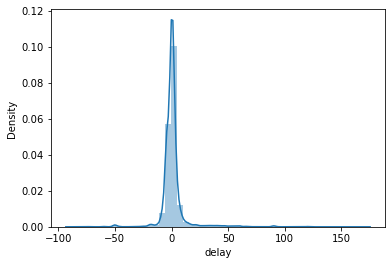

In [46]:
sns.distplot(Y_train)

<AxesSubplot:xlabel='baseline_create_date', ylabel='count'>

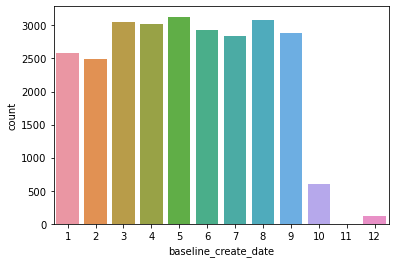

In [47]:
sns.countplot(x = X_train['baseline_create_date'].dt.month)

In [48]:
X_train.merge(Y_train, on = X_train.index)

,key_0,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,27116,0200759878,SA co,1.928534e+09,2018-12-30,2018-12-29,2019-01-14,40863.23,2018-12-30,NAH4,1.928534e+09,1
1,12409,0200769623,WAL-MAR systems,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,37091.32,2018-12-30,NAH4,1.928543e+09,-4
2,48573,0200726979,BJ'S corp,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,63.13,2018-12-30,NAA8,1.928540e+09,1
3,1410,0200466603,SMITH'S co,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,118687.65,2018-12-30,NAA8,1.928538e+09,0
4,26360,0200769623,WAL-MAR co,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,1445.64,2018-12-30,NAH4,1.928540e+09,-5
...,...,...,...,...,...,...,...,...,...,...,...,...
26714,47386,0200794332,COST associates,1.929962e+09,2019-10-07,2019-10-04,2019-10-22,38103.59,2019-10-07,NAAX,1.929962e+09,-1
26715,8788,0200705372,FR systems,1.929951e+09,2019-10-07,2019-10-05,2019-10-22,93998.85,2019-10-07,NAA8,1.929951e+09,0
26716,47400,0200747369,SCHNU corp,1.929981e+09,2019-10-07,2019-10-07,2019-10-22,11758.00,2019-10-07,NAA8,1.929981e+09,-1
26717,30805,0200769623,WAL-MAR in,1.929973e+09,2019-10-07,2019-10-05,2019-10-22,13182.63,2019-10-07,NAH4,1.929973e+09,-1


<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

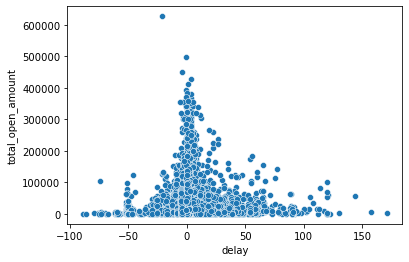

In [49]:
sns.scatterplot(data=X_train.merge(Y_train,on = X_train.index), x="delay", y="total_open_amount")

# FEATURE ENGINEERING

In [50]:
X_train.dtypes

cust_number                     object
name_customer                   object
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
dtype: object

In [51]:
## CHECKING VALUE COUNT

# X_train['business_code'].value_counts()

In [52]:
# IMPORTING LABEL ENCODER

from sklearn.preprocessing import LabelEncoder
# business_code_encoder = LabelEncoder()
# business_code_encoder.fit(X_train['business_code'])
# X_train['business_code'] = business_code_encoder.transform(X_train['business_code'])

In [53]:
# ENCODING X_TRAIN
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_train['cust_number'])
X_train['cust_number'] = cust_number_encoder.transform(X_train['cust_number'])

In [54]:
# CHECKING VALUE COUNT.
X_train['cust_number'].value_counts()

712     5659
614      986
696      748
690      662
1109     589
        ... 
199        1
151        1
87         1
7          1
630        1
Name: cust_number, Length: 1209, dtype: int64

In [55]:
# finding what are the new catagories in the validation set.
diff = set(X_validate['cust_number'])-set(cust_number_encoder.classes_)



# adding them to the classess variable.

for items in diff:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)

In [56]:
# doing same thing for test also

diff2 = set(X_local_test['cust_number'])-set(cust_number_encoder.classes_)
for items in diff2:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)

In [57]:
# ENCODING VALIDATE AND LOCAL TEST.
X_validate['cust_number'] = cust_number_encoder.transform(X_validate['cust_number'])
X_local_test['cust_number'] = cust_number_encoder.transform(X_local_test['cust_number'])

In [58]:
# ENCODING name_customer

X_train['name_customer'].value_counts()

WAL-MAR co             605
WAL-MAR foundation     600
WAL-MAR corporation    586
WAL-MAR corp           580
WAL-MAR associates     579
                      ... 
OVERH associates         1
NASS corporation         1
TOUC co                  1
VALUE systems            1
WESTI us                 1
Name: name_customer, Length: 3278, dtype: int64

In [59]:
# finding what are the new catagories in the validation set
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(X_train['name_customer'])
X_train['name_customer'] = name_customer_encoder.transform(X_train['name_customer'])

In [60]:
# finding what are the new catagories in the validation set
diff = set(X_validate['name_customer'])-set(name_customer_encoder.classes_)
for items in diff:
    # adding them to the classess variable
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_,items)
    # SAME FOR LOCAL TEST SET
diff2 = set(X_local_test['name_customer'])-set(name_customer_encoder.classes_)
for items in diff2:
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_,items)

In [61]:
# ENCODING THE SAME FEATURE IN VALIDATE AND LOCAL TEST. 
X_validate['name_customer'] = name_customer_encoder.transform(X_validate['name_customer'])
X_local_test['name_customer'] = name_customer_encoder.transform(X_local_test['name_customer'])

In [62]:
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms'] = cust_payment_terms_encoder.transform(X_train['cust_payment_terms'])

In [63]:
diff = set(X_validate['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)
for items in diff:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)
    
diff2 = set(X_local_test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)
for items in diff2:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)

In [64]:
# ENCODING THE SAME FEATURE IN VALIDATE AND LOCAL TEST.
X_validate['cust_payment_terms'] = cust_payment_terms_encoder.transform(X_validate['cust_payment_terms'])
X_local_test['cust_payment_terms'] = cust_payment_terms_encoder.transform(X_local_test['cust_payment_terms'])

In [65]:
#SPLITTING posting_date IN DAY, MONTH AND YEAR
X_train['posting_date_day'] = X_train['posting_date'].dt.day
X_validate['posting_date_day'] = X_validate['posting_date'].dt.day
X_local_test['posting_date_day'] = X_local_test['posting_date'].dt.day
 
X_train['posting_month'] = X_train['posting_date'].dt.month
X_validate['posting_month'] = X_validate['posting_date'].dt.month
X_local_test['posting_month'] = X_local_test['posting_date'].dt.month
  
X_train['posting_year'] = X_train['posting_date'].dt.year
X_validate['posting_year'] = X_validate['posting_date'].dt.year
X_local_test['posting_year'] = X_local_test['posting_date'].dt.year
 

In [66]:
X_train['document_create_day'] = X_train['document_create_date'].dt.day
X_validate['document_create_day'] = X_validate['document_create_date'].dt.day
X_local_test['document_create_day'] = X_local_test['document_create_date'].dt.day
 
X_train['document_create_month'] = X_train['document_create_date'].dt.month
X_validate['document_create_month'] = X_validate['document_create_date'].dt.month
X_local_test['document_create_month'] = X_local_test['document_create_date'].dt.month
  
X_train['document_create_year'] = X_train['document_create_date'].dt.year
X_validate['document_create_year'] = X_validate['document_create_date'].dt.year
X_local_test['document_create_year'] = X_local_test['document_create_date'].dt.year

In [67]:
X_train['due_in_date_day'] = X_train['due_in_date'].dt.day
X_validate['due_in_date_day'] = X_validate['due_in_date'].dt.day
X_local_test['due_in_date_day'] = X_local_test['due_in_date'].dt.day
 
X_train['due_month'] = X_train['due_in_date'].dt.month
X_validate['due_month'] = X_validate['due_in_date'].dt.month
X_local_test['due_month'] = X_local_test['due_in_date'].dt.month
  
X_train['due_year'] = X_train['due_in_date'].dt.year
X_validate['due_year'] = X_validate['due_in_date'].dt.year
X_local_test['due_year'] = X_local_test['due_in_date'].dt.year

In [68]:
X_train['baseline_create_date_day'] = X_train['baseline_create_date'].dt.day
X_validate['baseline_createdate_day'] = X_validate['baseline_create_date'].dt.day
X_local_test['baseline_create_date_day'] = X_local_test['baseline_create_date'].dt.day
 
X_train['baseline_create_month'] = X_train['baseline_create_date'].dt.month
X_validate['baseline_create_month'] = X_validate['baseline_create_date'].dt.month
X_local_test['baseline_create_month'] = X_local_test['baseline_create_date'].dt.month
  
X_train['baseline_create_year'] = X_train['baseline_create_date'].dt.year
X_validate['baseline_create_year'] = X_validate['baseline_create_date'].dt.year
X_local_test['baseline_create_year'] = X_local_test['baseline_create_date'].dt.year

In [69]:
#DROPPING THE 4 COLUMNS FROM TRAIN, VALIDATE AND LOCAL TEST SET
X_train.drop(['posting_date','document_create_date','due_in_date','baseline_create_date'], axis =1,inplace=True)
X_validate.drop(['posting_date','document_create_date','due_in_date','baseline_create_date'],axis=1 , inplace=True)
X_local_test.drop(['posting_date','document_create_date','due_in_date','baseline_create_date'],axis=1 , inplace=True)

In [70]:
X_train.dtypes

cust_number                   int32
name_customer                 int32
doc_id                      float64
total_open_amount           float64
cust_payment_terms            int32
invoice_id                  float64
posting_date_day              int64
posting_month                 int64
posting_year                  int64
document_create_day           int64
document_create_month         int64
document_create_year          int64
due_in_date_day               int64
due_month                     int64
due_year                      int64
baseline_create_date_day      int64
baseline_create_month         int64
baseline_create_year          int64
dtype: object

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

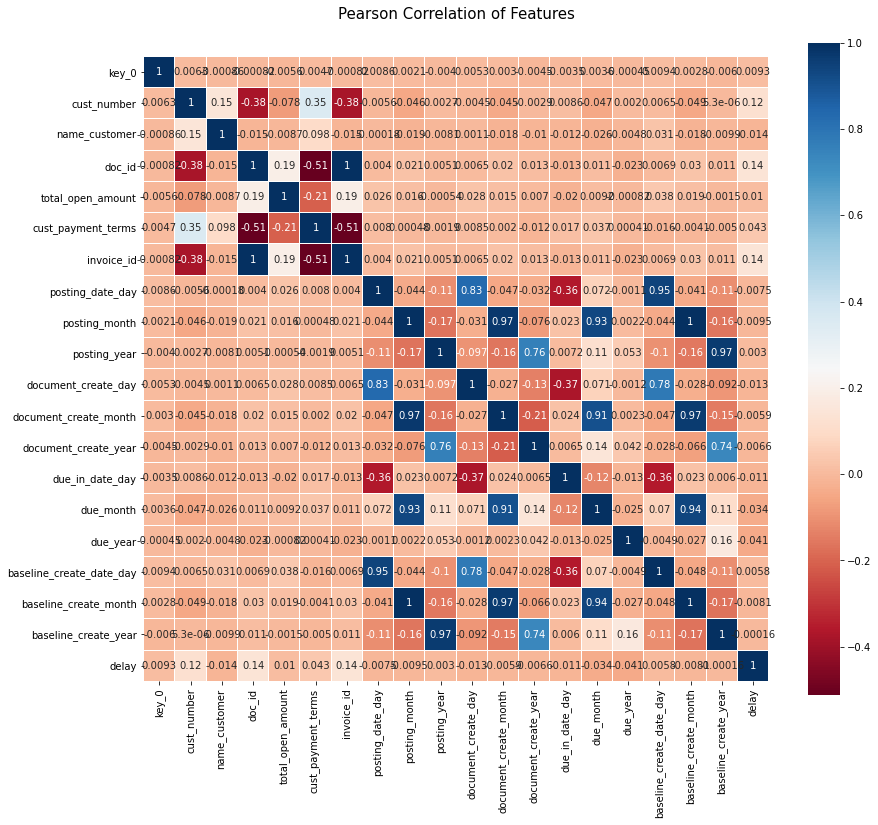

In [71]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(Y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [72]:
X_train.dtypes

cust_number                   int32
name_customer                 int32
doc_id                      float64
total_open_amount           float64
cust_payment_terms            int32
invoice_id                  float64
posting_date_day              int64
posting_month                 int64
posting_year                  int64
document_create_day           int64
document_create_month         int64
document_create_year          int64
due_in_date_day               int64
due_month                     int64
due_year                      int64
baseline_create_date_day      int64
baseline_create_month         int64
baseline_create_year          int64
dtype: object

In [73]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

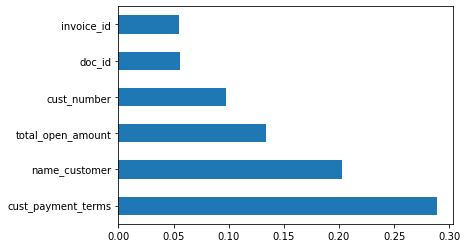

In [74]:
feature_importance=tree_based_feature_importance(X_train,Y_train)

In [75]:
# TAKING IMPORTANT FEATURES BASED ON ABOVE GRAPH
imp_features = ['cust_payment_terms','name_customer','invoice_id','cust_number','total_open_amount','due_in_date_day']

In [76]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train[imp_features], Y_train)

LinearRegression()

In [77]:
Y_predict1 = base_model.predict(X_validate[imp_features])

In [78]:
#CALCULATING MSE VALUE FOR VALIDATE
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_validate, Y_predict1, squared=False)

7.051390296522947

In [79]:
Y_predict2 = base_model.predict(X_local_test[imp_features])

In [80]:
#CALCULATING MSE VALUE FOR LOCAL TEST
mean_squared_error(Y_local_test, Y_predict2, squared=False)

10.06814866021901

In [81]:
# CALCULATING ACCURACY FOR TRAIN

accuracy = round(base_model.score(X_train[imp_features],Y_train)*100,2)
print(round(accuracy,2),'%')

6.7 %


In [82]:
# CALCULATING ACCURACY FOR TEST
accuracy = round(base_model.score(X_local_test[imp_features],Y_local_test)*100,2)
print(round(accuracy,2),'%')

7.64 %


In [83]:
#IMPORTING Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0 , max_depth=4)

In [84]:
# TRAINING THE MODEL ON TRAIN SET
regressor.fit(X_train[imp_features], Y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [85]:
Y_predict3 = regressor.predict(X_validate[imp_features])

In [86]:
mean_squared_error(Y_validate, Y_predict3, squared=False)

12.473365969961614

In [87]:
Y_predict4 = regressor.predict(X_local_test[imp_features])

In [88]:
mean_squared_error(Y_local_test, Y_predict4, squared=False)

14.470330136138097

In [89]:
regressor.score(X_local_test[imp_features],Y_local_test)*100

-90.77941017730949

ON COMPARING THE ACCURACY OF DECISION TREE REGRESSOR WITH THAT OF LINEAR REGRESSION WE CAN CLEARLY SAY THAT LINEAR REGRESSOR MODEL IS BEST AMOUNG THEM.

SO WE WILL USE LINEAR REGRESSOR MODEL ON THE FINAL TEST SET

# THE FINAL TEST

WE WILL DO THE

PREPROCESSING
FEATURE ENGINEERING
FEATURE SELECTION

In [90]:
b

,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
14,0200759878,SA co,NaT,1.930687e+09,2020-03-23,2020-03-23,2020-04-07,25083.84,2020-03-23,NAH4,1.930687e+09
15,0200762301,C&S WH foundation,NaT,1.930845e+09,2020-05-02,2020-05-01,2020-05-17,84476.75,2020-05-02,NAC6,1.930845e+09
16,0200786288,FAMILY systems,NaT,1.930778e+09,2020-04-13,2020-04-11,2020-04-28,12916.48,2020-04-13,NAC6,1.930778e+09
21,0200769623,WAL-MAR llc,NaT,1.930728e+09,2020-04-02,2020-04-01,2020-04-17,9077.23,2020-04-02,NAH4,1.930728e+09
38,0200418007,AM systems,NaT,1.930687e+09,2020-03-27,2020-03-23,2020-04-11,601.08,2020-03-27,NAA8,1.930687e+09
...,...,...,...,...,...,...,...,...,...,...,...
49976,0140101584,DICK co,NaT,1.991841e+09,2020-03-22,2020-03-18,2020-05-06,2132.24,2020-03-22,NAVF,1.991841e+09
49981,0200769623,WAL-MAR associates,NaT,1.930753e+09,2020-04-06,2020-04-06,2020-04-21,6640.59,2020-04-06,NAH4,1.930753e+09
49984,0200786288,FAMILY,NaT,1.930781e+09,2020-04-14,2020-04-13,2020-04-29,13137.47,2020-04-14,NAC6,1.930781e+09
49987,0100052024,CPG us,NaT,1.930665e+09,2020-03-17,2020-03-17,2020-05-21,34932.73,2020-03-17,NAGD,1.930665e+09


In [91]:
b.isnull().sum()

cust_number                0
name_customer              0
clear_date              9378
doc_id                     0
posting_date               0
document_create_date       0
due_in_date                0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
invoice_id                 0
dtype: int64

In [92]:
b.drop(['clear_date'],axis =1, inplace = True)

FEATURE ENGINEERING
CREATING EXACTLY SAME SET OF FEATURES EVEN THE CLOUMN NAME SHOULD BE SAME

In [93]:
# temp = set(X_test['business_code'])-set(business_code_encoder.classes_)
# for items in temp:
#     business_code_encoder.classes_= np.append(business_code_encoder.classes_,items)
    
# X_test['business_code'] = business_code_encoder.transform(X_test['business_code'])

In [94]:
temp = set(b['cust_number'])-set(cust_number_encoder.classes_)
for items in temp:
    cust_number_encoder.classes_= np.append(cust_number_encoder.classes_,items)
    
b['cust_number'] = cust_number_encoder.transform(b['cust_number'])

In [95]:
temp = set(b['name_customer'])-set(name_customer_encoder.classes_)
for items in temp:
    name_customer_encoder.classes_= np.append(name_customer_encoder.classes_,items)
    
b['name_customer'] = name_customer_encoder.transform(b['name_customer'])

In [96]:
temp = set(b['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)
for items in temp:
    cust_payment_terms_encoder.classes_= np.append(cust_payment_terms_encoder.classes_,items)
    
b['cust_payment_terms'] = cust_payment_terms_encoder.transform(b['cust_payment_terms'])

In [97]:
b.dtypes

cust_number                      int32
name_customer                    int32
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms               int32
invoice_id                     float64
dtype: object

In [98]:
b['posting_date_day'] = b['posting_date'].dt.day
 
b['posting_month'] = b['posting_date'].dt.month 

b['posting_year'] = b['posting_date'].dt.year 

In [99]:
b['baseline_create_date_day'] = b['baseline_create_date'].dt.day
 
b['baseline_create_month'] = b['baseline_create_date'].dt.month 

b['baseline_create_year'] = b['baseline_create_date'].dt.year

In [100]:
b['due_in_date_day'] = b['due_in_date'].dt.day
 
b['due_month'] = b['due_in_date'].dt.month 

b['due_in_year'] = b['due_in_date'].dt.year

In [101]:
b['document_create_date_day'] = b['document_create_date'].dt.day
 
b['document_create_month'] = b['document_create_date'].dt.month 

b['document_create_year'] = b['document_create_date'].dt.year

In [102]:
b.drop(['posting_date','document_create_date','due_in_date','baseline_create_date'], axis = 1, inplace = True)

In [103]:
b.dtypes

cust_number                   int32
name_customer                 int32
doc_id                      float64
total_open_amount           float64
cust_payment_terms            int32
invoice_id                  float64
posting_date_day              int64
posting_month                 int64
posting_year                  int64
baseline_create_date_day      int64
baseline_create_month         int64
baseline_create_year          int64
due_in_date_day               int64
due_month                     int64
due_in_year                   int64
document_create_date_day      int64
document_create_month         int64
document_create_year          int64
dtype: object

In [104]:
X_train.dtypes

cust_number                   int32
name_customer                 int32
doc_id                      float64
total_open_amount           float64
cust_payment_terms            int32
invoice_id                  float64
posting_date_day              int64
posting_month                 int64
posting_year                  int64
document_create_day           int64
document_create_month         int64
document_create_year          int64
due_in_date_day               int64
due_month                     int64
due_year                      int64
baseline_create_date_day      int64
baseline_create_month         int64
baseline_create_year          int64
dtype: object

PREDICTION

In [105]:
Final_result1 = base_model.predict(b[imp_features])

In [106]:
Final_result1 = pd.Series(Final_result1,name='delay')

In [107]:
Final = b.merge(Final_result1 , on = b.index )
Final

,key_0,cust_number,name_customer,doc_id,total_open_amount,cust_payment_terms,invoice_id,posting_date_day,posting_month,posting_year,baseline_create_date_day,baseline_create_month,baseline_create_year,due_in_date_day,due_month,due_in_year,document_create_date_day,document_create_month,document_create_year,delay
0,14,690,2541,1.930687e+09,25083.84,33,1.930687e+09,23,3,2020,23,3,2020,7,4,2020,23,3,2020,1.017863
1,15,696,463,1.930845e+09,84476.75,25,1.930845e+09,2,5,2020,2,5,2020,17,5,2020,1,5,2020,1.028998
2,16,752,947,1.930778e+09,12916.48,25,1.930778e+09,13,4,2020,13,4,2020,28,4,2020,11,4,2020,1.194056
3,21,712,3183,1.930728e+09,9077.23,33,1.930728e+09,2,4,2020,2,4,2020,17,4,2020,1,4,2020,0.757308
4,38,476,107,1.930687e+09,601.08,19,1.930687e+09,27,3,2020,27,3,2020,11,4,2020,23,3,2020,-1.299191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,49976,258,4013,1.991841e+09,2132.24,57,1.991841e+09,22,3,2020,22,3,2020,6,5,2020,18,3,2020,-0.244710
9374,49981,712,3177,1.930753e+09,6640.59,33,1.930753e+09,6,4,2020,6,4,2020,21,4,2020,6,4,2020,0.703860
9375,49984,752,939,1.930781e+09,13137.47,25,1.930781e+09,14,4,2020,14,4,2020,29,4,2020,13,4,2020,1.183205
9376,49987,222,3988,1.930665e+09,34932.73,32,1.930665e+09,17,3,2020,17,3,2020,21,5,2020,17,3,2020,-4.300633


CREATING due_in_date FROM DATE, MONTH AND YEAR

In [108]:
due_in_date = ["due_in_year","due_month","due_in_date_day"]
Final['due_in_date'] = Final[due_in_date].apply(lambda x: ''.join(x.values.astype(str)), axis = 'columns')
Final['due_in_date'] = pd.to_datetime(Final['due_in_date'], format= '%Y%m%d')

In [109]:
Final

,key_0,cust_number,name_customer,doc_id,total_open_amount,cust_payment_terms,invoice_id,posting_date_day,posting_month,posting_year,...,baseline_create_month,baseline_create_year,due_in_date_day,due_month,due_in_year,document_create_date_day,document_create_month,document_create_year,delay,due_in_date
0,14,690,2541,1.930687e+09,25083.84,33,1.930687e+09,23,3,2020,...,3,2020,7,4,2020,23,3,2020,1.017863,2020-04-07
1,15,696,463,1.930845e+09,84476.75,25,1.930845e+09,2,5,2020,...,5,2020,17,5,2020,1,5,2020,1.028998,2020-05-17
2,16,752,947,1.930778e+09,12916.48,25,1.930778e+09,13,4,2020,...,4,2020,28,4,2020,11,4,2020,1.194056,2020-04-28
3,21,712,3183,1.930728e+09,9077.23,33,1.930728e+09,2,4,2020,...,4,2020,17,4,2020,1,4,2020,0.757308,2020-04-17
4,38,476,107,1.930687e+09,601.08,19,1.930687e+09,27,3,2020,...,3,2020,11,4,2020,23,3,2020,-1.299191,2020-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,49976,258,4013,1.991841e+09,2132.24,57,1.991841e+09,22,3,2020,...,3,2020,6,5,2020,18,3,2020,-0.244710,2020-05-06
9374,49981,712,3177,1.930753e+09,6640.59,33,1.930753e+09,6,4,2020,...,4,2020,21,4,2020,6,4,2020,0.703860,2020-04-21
9375,49984,752,939,1.930781e+09,13137.47,25,1.930781e+09,14,4,2020,...,4,2020,29,4,2020,13,4,2020,1.183205,2020-04-29
9376,49987,222,3988,1.930665e+09,34932.73,32,1.930665e+09,17,3,2020,...,3,2020,21,5,2020,17,3,2020,-4.300633,2020-05-21


CREATING PAYMENT_DATE COLUMN

In [110]:
Final['Delay'] = pd.to_timedelta(pd.np.ceil(Final['delay']), unit="D")

In [111]:
Final['payment_date'] = Final['due_in_date'] + Final['Delay']

In [112]:
Final

,key_0,cust_number,name_customer,doc_id,total_open_amount,cust_payment_terms,invoice_id,posting_date_day,posting_month,posting_year,...,due_in_date_day,due_month,due_in_year,document_create_date_day,document_create_month,document_create_year,delay,due_in_date,Delay,payment_date
0,14,690,2541,1.930687e+09,25083.84,33,1.930687e+09,23,3,2020,...,7,4,2020,23,3,2020,1.017863,2020-04-07,2 days,2020-04-09
1,15,696,463,1.930845e+09,84476.75,25,1.930845e+09,2,5,2020,...,17,5,2020,1,5,2020,1.028998,2020-05-17,2 days,2020-05-19
2,16,752,947,1.930778e+09,12916.48,25,1.930778e+09,13,4,2020,...,28,4,2020,11,4,2020,1.194056,2020-04-28,2 days,2020-04-30
3,21,712,3183,1.930728e+09,9077.23,33,1.930728e+09,2,4,2020,...,17,4,2020,1,4,2020,0.757308,2020-04-17,1 days,2020-04-18
4,38,476,107,1.930687e+09,601.08,19,1.930687e+09,27,3,2020,...,11,4,2020,23,3,2020,-1.299191,2020-04-11,-1 days,2020-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,49976,258,4013,1.991841e+09,2132.24,57,1.991841e+09,22,3,2020,...,6,5,2020,18,3,2020,-0.244710,2020-05-06,0 days,2020-05-06
9374,49981,712,3177,1.930753e+09,6640.59,33,1.930753e+09,6,4,2020,...,21,4,2020,6,4,2020,0.703860,2020-04-21,1 days,2020-04-22
9375,49984,752,939,1.930781e+09,13137.47,25,1.930781e+09,14,4,2020,...,29,4,2020,13,4,2020,1.183205,2020-04-29,2 days,2020-05-01
9376,49987,222,3988,1.930665e+09,34932.73,32,1.930665e+09,17,3,2020,...,21,5,2020,17,3,2020,-4.300633,2020-05-21,-4 days,2020-05-17


BINNING

In [113]:
binning_intervals = [
    (Final['delay'] < 0),
    (Final['delay'] == 0),
    (Final['delay'] < 15),
    (Final['delay'] == 15),
    (Final['delay'] < 30),
    (Final['delay'] == 30),
    (Final['delay'] < 45),
    (Final['delay'] == 45),
    (Final['delay'] < 60)
]

In [114]:
Bucketize = [
    'Before due date',
    'On due date',
    'between 0 to 15 days due date',
    'On 15th days due date',
    'between 16 to 30 days due date',
    'On 30th days due date',
    'between 31 to 45 days due date',
    'On 45th days due date',
    'between 46 to 60 days due date'
]

In [115]:
Final.loc[:,'bucket'] = np.select(binning_intervals,Bucketize)

# THE FINAL DATAFRAME WITH PAYMENT DATE AND BINNING

In [116]:
Final

,key_0,cust_number,name_customer,doc_id,total_open_amount,cust_payment_terms,invoice_id,posting_date_day,posting_month,posting_year,...,due_month,due_in_year,document_create_date_day,document_create_month,document_create_year,delay,due_in_date,Delay,payment_date,bucket
0,14,690,2541,1.930687e+09,25083.84,33,1.930687e+09,23,3,2020,...,4,2020,23,3,2020,1.017863,2020-04-07,2 days,2020-04-09,between 0 to 15 days due date
1,15,696,463,1.930845e+09,84476.75,25,1.930845e+09,2,5,2020,...,5,2020,1,5,2020,1.028998,2020-05-17,2 days,2020-05-19,between 0 to 15 days due date
2,16,752,947,1.930778e+09,12916.48,25,1.930778e+09,13,4,2020,...,4,2020,11,4,2020,1.194056,2020-04-28,2 days,2020-04-30,between 0 to 15 days due date
3,21,712,3183,1.930728e+09,9077.23,33,1.930728e+09,2,4,2020,...,4,2020,1,4,2020,0.757308,2020-04-17,1 days,2020-04-18,between 0 to 15 days due date
4,38,476,107,1.930687e+09,601.08,19,1.930687e+09,27,3,2020,...,4,2020,23,3,2020,-1.299191,2020-04-11,-1 days,2020-04-10,Before due date
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,49976,258,4013,1.991841e+09,2132.24,57,1.991841e+09,22,3,2020,...,5,2020,18,3,2020,-0.244710,2020-05-06,0 days,2020-05-06,Before due date
9374,49981,712,3177,1.930753e+09,6640.59,33,1.930753e+09,6,4,2020,...,4,2020,6,4,2020,0.703860,2020-04-21,1 days,2020-04-22,between 0 to 15 days due date
9375,49984,752,939,1.930781e+09,13137.47,25,1.930781e+09,14,4,2020,...,4,2020,13,4,2020,1.183205,2020-04-29,2 days,2020-05-01,between 0 to 15 days due date
9376,49987,222,3988,1.930665e+09,34932.73,32,1.930665e+09,17,3,2020,...,5,2020,17,3,2020,-4.300633,2020-05-21,-4 days,2020-05-17,Before due date
